<a href="https://colab.research.google.com/github/jpcampos04/Sprint13_project/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project description

The insurance company Sure Tomorrow wants to solve several tasks using machine learning and asks you to evaluate the next possibilities:

- Task 1: Find similar customers to a specific customer. This will help company's marketing agents.
- Task 2: Predict the probability of a new customer receiving an insurance claim. Can a predictive model perform better than a dummy model?
- Task 3: Predict the number of insurance claims that a new customer might receive using a linear regression model.
- Task 4: Protect customer's personal data without affecting the model from previous exercise. You need to develop a data transformation algorithm that makes it difficult to retrieve personal information if the data falls into the wrong hands. This is called data masking or obfuscation. However, the data must be protected in such a way that the quality of the machine learning models is not compromised. You don't need to choose the best model; you just need to demonstrate that the algorithm works correctly.



# Data preprocessing and exploration

## Preparation

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import sklearn.linear_model
import sklearn.metrics
from sklearn.metrics import f1_score, mean_squared_error, r2_score
import sklearn.neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from IPython.display import display

## Load data

Load the data and do a basic check to make sure there are no obvious problems.

In [ ]:
# Download Datasets
df = pd.read_csv('/datasets/insurance_us.csv')

rename the columns so that the code looks more consistent with its style.

In [ ]:
df = df.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'Salary': 'income',
    'Family members': 'family_members',
    'Insurance benefits': 'insurance_benefits'
    })

In [ ]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
1837,1,31.0,29000.0,2,0
4920,0,23.0,51300.0,1,0
406,1,36.0,41300.0,0,0
489,1,22.0,32600.0,1,0
4187,0,20.0,48400.0,0,0
4180,1,37.0,35800.0,1,0
4464,0,33.0,30900.0,1,0
4923,0,48.0,58200.0,0,1
3329,1,31.0,32800.0,0,0
905,1,44.0,32100.0,1,1


In [ ]:
# Visualize Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [ ]:
# We might want to change the age type (from float to int), although this isn't crucial.

# Write your conversion here if you wish:
df['age'] = df['age'].astype('int')

In [ ]:
# Check the change has been done
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [ ]:
# Now take a look at the descriptive statistics of the data.

# Does everything look okay?
print(df.describe())

            gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  46600.000000        2.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  
count         5000.000000  
mean             0.148000  
std              0.463183  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              5.000000  


0    0.501
1    0.499
Name: gender, dtype: float64


<AxesSubplot:>

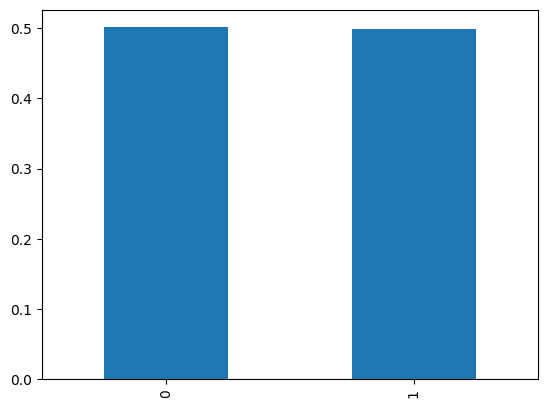

In [ ]:
gender = df['gender'].value_counts(normalize=True)
print(gender)
gender.plot(kind='bar')

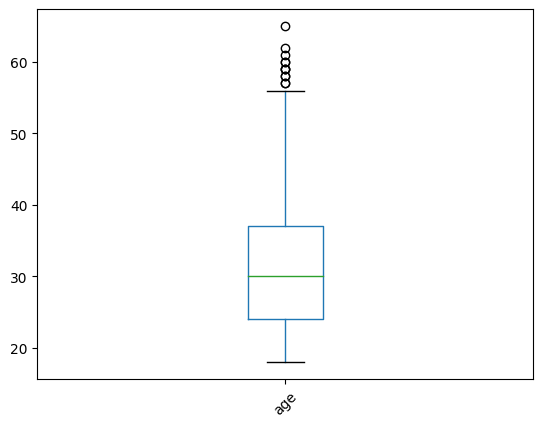

In [ ]:
age = df['age']
age.plot(kind="box")
plt.xticks(rotation=45)
plt.show()

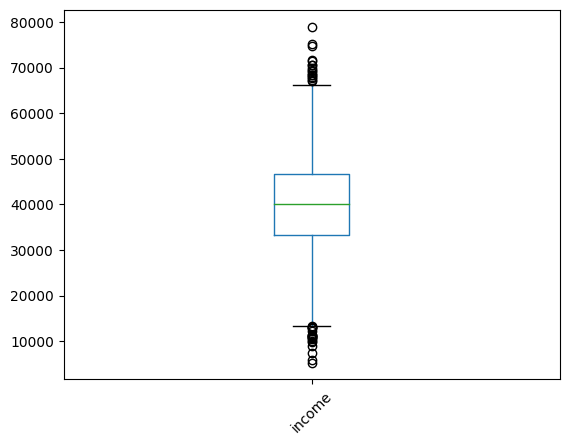

In [ ]:
income = df['income']
income.plot(kind="box")
plt.xticks(rotation=45)
plt.show()

1    0.3628
0    0.3026
2    0.2142
3    0.0878
4    0.0248
5    0.0064
6    0.0014
Name: family_members, dtype: float64


<AxesSubplot:>

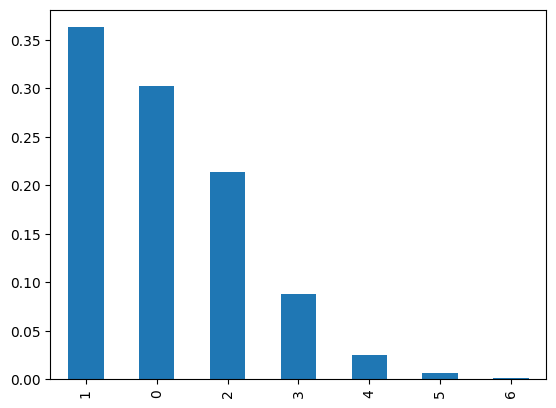

In [ ]:
family_members = df['family_members'].value_counts(normalize=True)
print(family_members)
family_members.plot(kind='bar')

0    0.8872
1    0.0846
2    0.0230
3    0.0036
4    0.0014
5    0.0002
Name: insurance_benefits, dtype: float64


<AxesSubplot:>

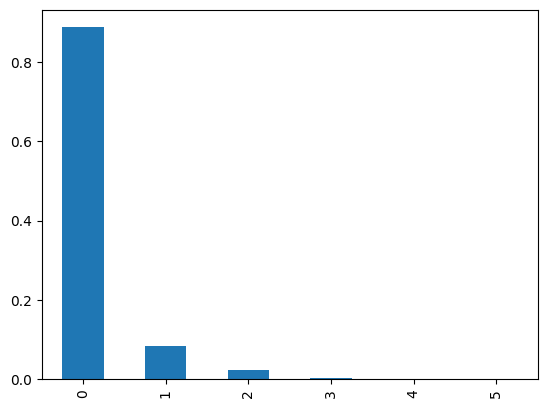

In [ ]:
insurance_benefits = df['insurance_benefits'].value_counts(normalize=True)
print(insurance_benefits)
insurance_benefits.plot(kind='bar')

**Observations**
- The sample is almost evenly split between men and women.

- The minimum age is 18 years; the first quartile is 24 years; the mean is 30 years; the third quartile is 37 years; and there are outliers between 55 and 65 years, with 65 being the maximum age.

- The minimum income is 5,300; the first quartile is 33,300; the mean is 40,200; the third quartile is 46,600; and there are outliers between 65,000 and 79,000, with 79,000 being the maximum income.

- The number of family members among the clients is as follows: 1 member (36%); 0 members (30%); 2 members (21%); 3 members (8%); 4 members (2%); and 5 and 6 members (less than 1% each).

- The number of insurance claims per customer is 0 claims 88%; 1 claims 8%, 2 claims 2% while 3, 4 and 5 claims less than 1% each.

## Exploratory data analysis

Let's quickly check if there are certain customer groups by looking at the pairs chart.

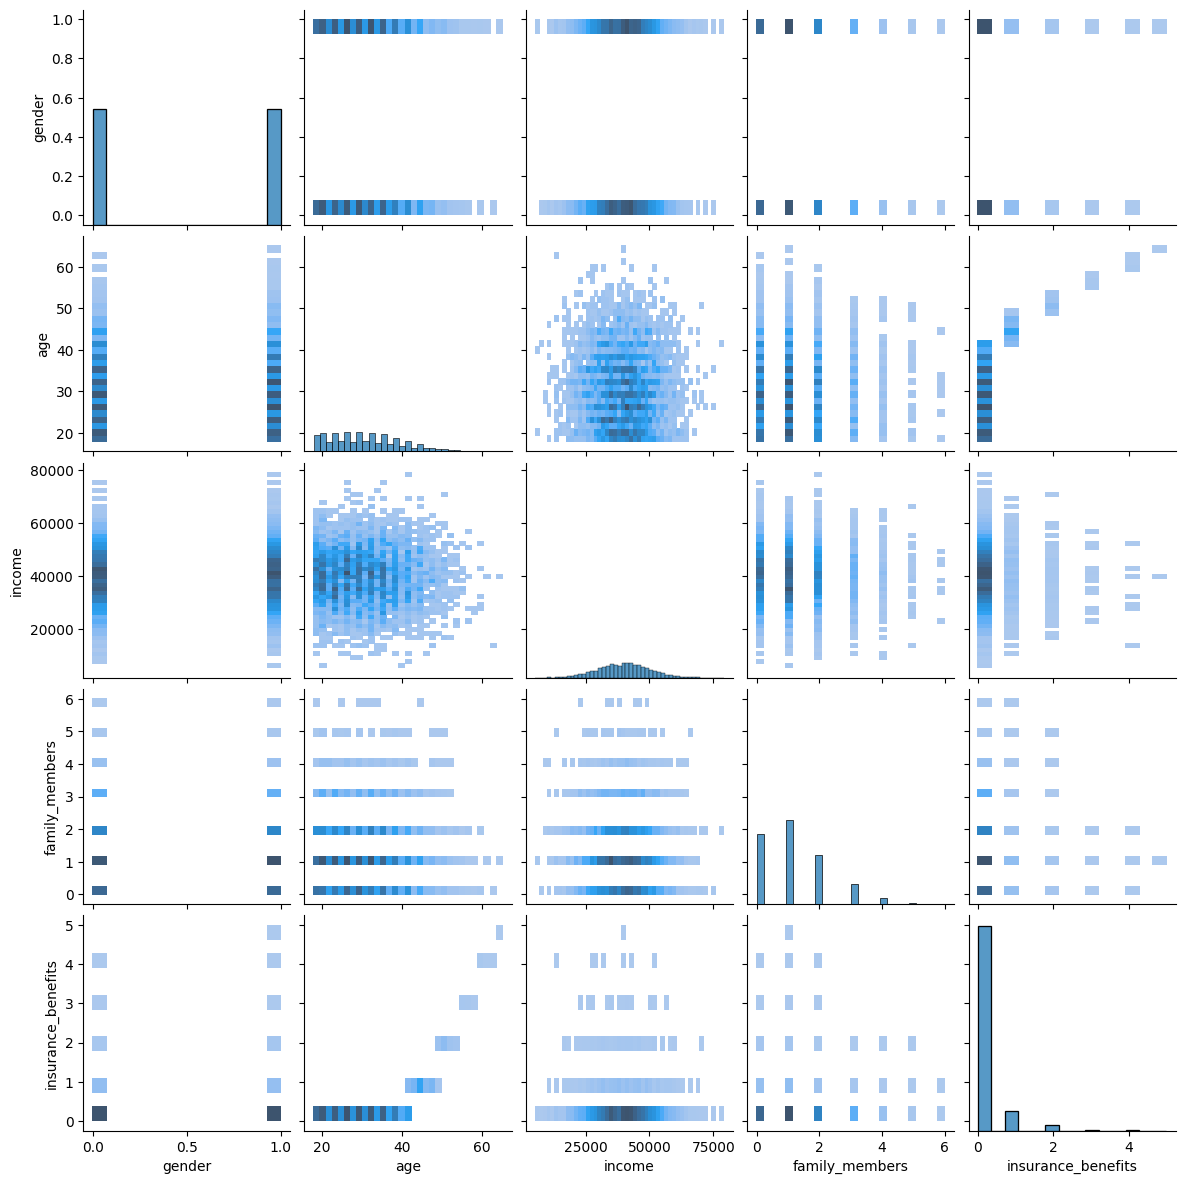

In [ ]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Okay, it's a bit tricky to detect obvious groups (clusters) since it's difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite useful.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.

Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)
- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.

Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.

Pruébalo para cuatro combinaciones de dos casos
- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:
- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?
- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [ ]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [ ]:
def get_knn(df, n, k=2, metric='euclidean', features_names=None):

    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar
    :param n: número de objetos para los que se buscan los vecinos más cercanos
    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia
    :param Features_names: columnas que se utilizarán para calcular la distancia
    :return: DataFrame con los vecinos más cercanos y sus distancias
    """

    if features_names is None:
        raise ValueError("Es necesario'features_names' para determinar las columnas a analizar" )

    # Transforma las características en un vector
    x = df[features_names].values
    # Entrena el modelo
    nbrs = NearestNeighbors(n_neighbors=k+1, metric=metric).fit(x)
    # Encuentra los vecinos más cercanos
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    # Obtiene los datos de los vecinos
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]],
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)

    return df_res

Escalar datos.

In [ ]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [ ]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
3407,0.0,0.384615,0.593671,0.500000,0
1927,1.0,0.461538,0.694937,0.166667,0
1833,0.0,0.769231,0.748101,0.166667,2
4473,1.0,0.446154,0.530380,0.333333,0
3847,0.0,0.569231,0.472152,0.333333,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [ ]:
nbrs_scaled_euclidean = get_knn(df_scaled, 2, k=3, features_names=feature_names)
print(nbrs_scaled_euclidean)

     gender       age    income  family_members  insurance_benefits  distance
2       0.0  0.446154  0.265823             0.0                   0  0.000000
509     0.0  0.446154  0.255696             0.0                   0  0.010127
224     0.0  0.446154  0.277215             0.0                   0  0.011392


In [ ]:
nbrs_not_scaled_euclidean = get_knn(df, 2, k=3, features_names=feature_names)
print(nbrs_not_scaled_euclidean)

      gender  age   income  family_members  insurance_benefits   distance
2          0   29  21000.0               0                   0    0.00000
4544       1   31  21000.0               1                   0    2.44949
2031       0   30  20900.0               0                   0  100.00500


In [ ]:
nbrs_scaled_manhattan = get_knn(df_scaled, 2, k=3, metric='cityblock', features_names=feature_names)
print(nbrs_scaled_manhattan)

     gender       age    income  family_members  insurance_benefits  distance
2       0.0  0.446154  0.265823             0.0                   0  0.000000
509     0.0  0.446154  0.255696             0.0                   0  0.010127
224     0.0  0.446154  0.277215             0.0                   0  0.011392


In [ ]:
nbrs_not_scaled_manhattan = get_knn(df, 2, k=3, metric='cityblock', features_names=feature_names)
print(nbrs_scaled_manhattan)

     gender       age    income  family_members  insurance_benefits  distance
2       0.0  0.446154  0.265823             0.0                   0  0.000000
509     0.0  0.446154  0.255696             0.0                   0  0.010127
224     0.0  0.446154  0.277215             0.0                   0  0.011392


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?**

- De acuerdo a los resultados obtenidos el escalado si afecta cuando se trata de distancia Euclideana tomando vecinos a una mayor distancia. Mientras que cuando se utiliza la distancia Manhattan se obtiene el mismo resultado.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?**

- Los resultados son los mismos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente implementación del procedimiento get_knn. Probaste de forma clara las cuatro combinaciones de escalado y distancia, y proporcionaste respuestas justificadas sobre el impacto del escalado en k-NN.

</div>

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.

Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.
- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.

La probabilidad de pagar cualquier prestación del seguro puede definirse como

$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [ ]:
# сalcula el objetivo
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [ ]:
# comprueba el desequilibrio de clases con value_counts()
print(df['insurance_benefits_received'].value_counts(normalize=True))

0    0.8872
1    0.1128
Name: insurance_benefits_received, dtype: float64


In [ ]:
# Función para evaluar el clasificador
def eval_classifier(y_true, y_pred):
    f1 = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1:.2f}')
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [ ]:
# Función para el modelo aleatorio
def rnd_model_predict(P, size, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [ ]:
# Probar el modelo dummy con distintas probabilidades
for P in [0, df['insurance_benefits_received'].mean(), 0.5, 1]:
    print(f'Probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(df))
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    print()

Probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.8872 0.    ]
 [0.1128 0.    ]]

Probabilidad: 0.11
F1: 0.12
Matriz de confusión
[[0.7914 0.0958]
 [0.0994 0.0134]]

Probabilidad: 0.50
F1: 0.20
Matriz de confusión
[[0.456  0.4312]
 [0.053  0.0598]]

Probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.     0.8872]
 [0.     0.1128]]



In [ ]:
# Seleccionar características y objetivo
features = df.drop(columns=['insurance_benefits', 'insurance_benefits_received'])
target = df['insurance_benefits_received']

In [ ]:
# Dividir en entrenamiento y prueba (70:30)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=42, stratify=target)

In [ ]:
# Escalar los datos
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [ ]:
# Evaluar kNN para k=1 a 10
f1_scores_original = []
f1_scores_scaled = []

for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)

    # Entrenar y predecir con datos originales
    model.fit(features_train, target_train)
    target_pred_orig = model.predict(features_test)
    f1_orig = f1_score(target_test, target_pred_orig)
    f1_scores_original.append(f1_orig)

    # Entrenar y predecir con datos escalados
    model.fit(features_train_scaled, target_train)
    target_pred_scaled = model.predict(features_test_scaled)
    f1_scaled = f1_score(target_test, target_pred_scaled)
    f1_scores_scaled.append(f1_scaled)

In [ ]:
# Mostrar resultados
for k in range(1, 11):
    print(f'k={k}: F1 original = {f1_scores_original[k-1]:.2f}, F1 escalado = {f1_scores_scaled[k-1]:.2f}')

k=1: F1 original = 0.60, F1 escalado = 0.92
k=2: F1 original = 0.33, F1 escalado = 0.92
k=3: F1 original = 0.34, F1 escalado = 0.94
k=4: F1 original = 0.22, F1 escalado = 0.89
k=5: F1 original = 0.26, F1 escalado = 0.92
k=6: F1 original = 0.09, F1 escalado = 0.89
k=7: F1 original = 0.10, F1 escalado = 0.93
k=8: F1 original = 0.03, F1 escalado = 0.91
k=9: F1 original = 0.05, F1 escalado = 0.93
k=10: F1 original = 0.02, F1 escalado = 0.91


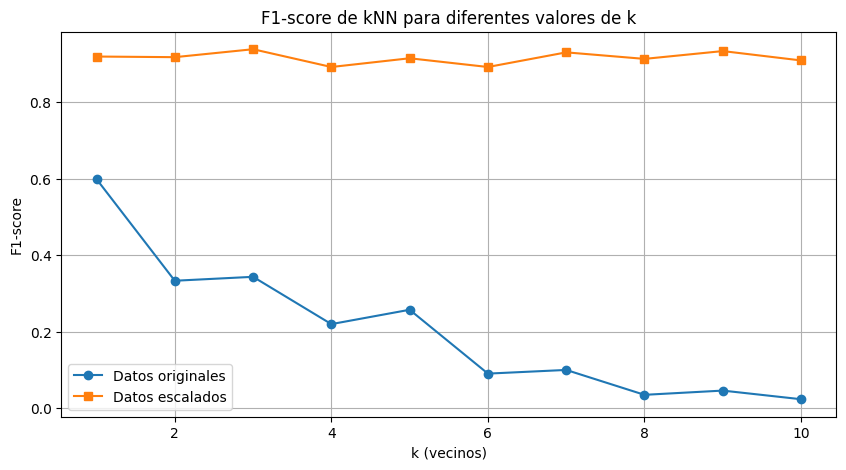

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), f1_scores_original, marker='o', label='Datos originales')
plt.plot(range(1, 11), f1_scores_scaled, marker='s', label='Datos escalados')
plt.xlabel('k (vecinos)')
plt.ylabel('F1-score')
plt.title('F1-score de kNN para diferentes valores de k')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(target_pred_orig.mean(), 'probable que obtenga una prestación')

0.0013333333333333333 probable que obtenga una prestación


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Muy bien implementado el modelo dummy y el clasificador kNN. Has escalado adecuadamente los datos, usado f1_score correctamente y mostrado los resultados con una visualización clara. Notable análisis sobre cómo el escalado mejora sustancialmente el desempeño del modelo.

</div>

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos
- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades
- $y$ — objetivo (un vector)
- $\hat{y}$ — objetivo estimado (un vector)
- $w$ — vector de pesos

La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:

$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:

$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos

$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [ ]:
class MyLinearRegression:

    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        # añadir columna de 1s para el intercepto
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # fórmula de la solución analítica: w = (XᵗX)⁻¹Xᵗy
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        # añadir columna de 1s también a los datos de predicción
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        return y_pred

In [ ]:
def eval_regressor(y_true, y_pred):

    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')

    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')

In [ ]:
# Definir características y objetivo
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Crear y entrenar modelo
lr = MyLinearRegression()
lr.fit(X_train, y_train)

# Predecir y evaluar
y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

RMSE: 0.34
R2: 0.66


In [ ]:
# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar y evaluar modelo con datos escalados
lr_scaled = MyLinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

y_test_pred_scaled = lr_scaled.predict(X_test_scaled)
eval_regressor(y_test, y_test_pred_scaled)

RMSE: 0.34
R2: 0.66


In [ ]:
# Grafica
def plot_regression_results(y_true, y_pred, title=''):
    residuals = y_true - y_pred

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Gráfico de residuos
    axs[0].scatter(y_pred, residuals, alpha=0.5)
    axs[0].axhline(0, color='red', linestyle='--')
    axs[0].set_title('Residuos vs Predicción')
    axs[0].set_xlabel('Predicción')
    axs[0].set_ylabel('Residuo')

    # Gráfico de valores reales vs predichos
    axs[1].scatter(y_true, y_pred, alpha=0.5)
    axs[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    axs[1].set_title('Valor Real vs Predicho')
    axs[1].set_xlabel('Valor Real')
    axs[1].set_ylabel('Predicción')

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

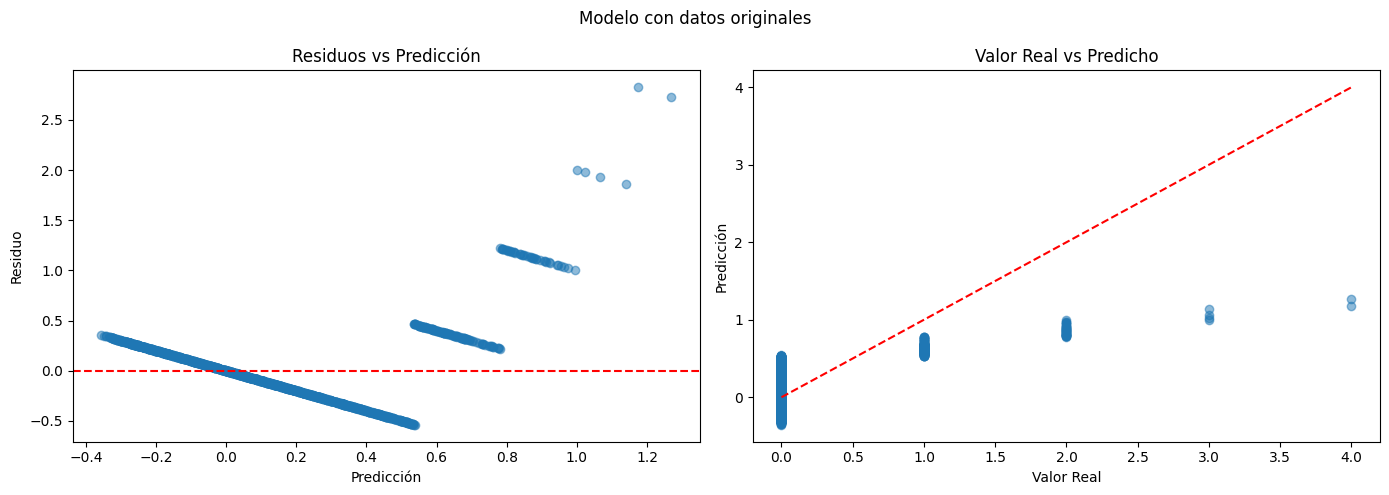

In [ ]:
plot_regression_results(y_test, y_test_pred, title='Modelo con datos originales')

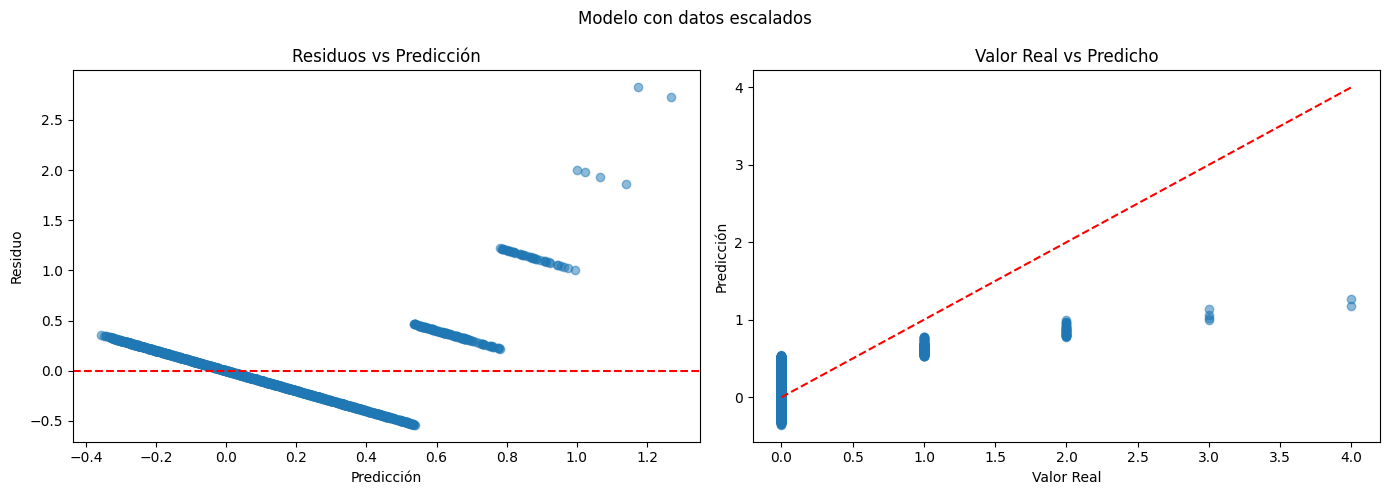

In [ ]:
plot_regression_results(y_test, y_test_pred_scaled, title='Modelo con datos escalados')

- No se logra observar alguna diferencia significativa respecto a los datos originales contra los escalados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente trabajo implementando regresión lineal con álgebra lineal. También comparaste correctamente resultados entre datos originales y escalados. La clase MyLinearRegression está bien estructurada y los gráficos de residuos añaden valor al análisis.

</div>

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$.

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [ ]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [ ]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [ ]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [ ]:
# Verificar si P es invertible (determinante distinto de 0)
det_P = np.linalg.det(P)
print(f"Determinante de P: {det_P:.5f}")
if np.isclose(det_P, 0):
    raise ValueError("La matriz P no es invertible")
else:
    print("P es invertible")

Determinante de P: 0.24339
P es invertible


¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

In [ ]:
# Transformar X -> X'
X_transformed = X @ P

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [ ]:
# Recuperar X original: X = X' @ P⁻¹
P_inv = np.linalg.inv(P)
X_recovered = X_transformed @ P_inv

Muestra los tres casos para algunos clientes
- Datos originales
- El que está transformado
- El que está invertido (recuperado)

In [ ]:
# Comparar los tres casos para los primeros 5 clientes
for i in range(5):
    print(f"\nCliente {i+1}:")
    print("Original     :", X[i])
    print("Transformado :", X_transformed[i])
    print("Recuperado   :", X_recovered[i])


Cliente 1:
Original     : [1.00e+00 4.10e+01 4.96e+04 1.00e+00]
Transformado : [ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
Recuperado   : [1.00e+00 4.10e+01 4.96e+04 1.00e+00]

Cliente 2:
Original     : [0.0e+00 4.6e+01 3.8e+04 1.0e+00]
Transformado : [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
Recuperado   : [1.679528e-12 4.600000e+01 3.800000e+04 1.000000e+00]

Cliente 3:
Original     : [    0.    29. 21000.     0.]
Transformado : [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
Recuperado   : [-6.23021448e-13  2.90000000e+01  2.10000000e+04 -2.03032656e-13]

Cliente 4:
Original     : [0.00e+00 2.10e+01 4.17e+04 2.00e+00]
Transformado : [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
Recuperado   : [-1.0890777e-12  2.1000000e+01  4.1700000e+04  2.0000000e+00]

Cliente 5:
Original     : [1.00e+00 2.80e+01 2.61e+04 0.00e+00]
Transformado : [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]
Recuperado   : [ 1.000

Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

- Las diferencias se pueden deber a inexactitudes en los decimales o redondeos.

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior?

¿Cuáles serían los valores predichos con $w_P$?

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?

Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

- El vector de pesos sobre los datos ofuscados son iguales a una matriz invertible de la matriz $P$ multiplicado por el vector de pesos originales.

  $$w_P = P^{−1} w$$

- Los valores predichos no cambian aunque los datos hayan sido ofuscados con una transformación invertible.

**Prueba analítica**

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Te dejo aquí la justificación de la prueba análitica.

- Dado el vector de pesos original:
$$
w = (X^T X)^{-1} X^T y
$$

- Para los datos ofuscados \(X' = X P\), los pesos son:
$$
w_P = \bigl((X P)^T (X P)\bigr)^{-1} (X P)^T y
$$

- Desarrollando:
$$
w_P = (P^T X^T X P)^{-1} P^T X^T y
$$

- Como \(P\) es invertible, se cumple la propiedad:
$$
(P^T X^T X P)^{-1} = P^{-1} (X^T X)^{-1} (P^T)^{-1}
$$

- Entonces,
$$
w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w
$$

- Los valores predichos con los datos ofuscados son:
$$
\hat{y}_P = X P w_P = X P (P^{-1} w) = X w = \hat{y}
$$

- Las predicciones son iguales y la métrica de error (como RMSE) no cambia al usar datos ofuscados con la matriz invertible \(P\).

</div>

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.

Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.

Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.
- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.
- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [ ]:
# Clase que admite ofuscación opcional
class ObfuscationLinearRegression:
    def __init__(self, use_obfuscation=False, seed=42):
        self.use_obfuscation = use_obfuscation
        self.seed = seed
        self.P = None
        self.P_inv = None
        self.model = LinearRegression()

    def generate_invertible_matrix(self, n_features):
        rng = np.random.default_rng(self.seed)
        max_attempts = 100
        for _ in range(max_attempts):
            P = rng.random((n_features, n_features))
            if np.linalg.det(P) != 0:
                self.P = P
                self.P_inv = np.linalg.inv(P)
                return
        raise ValueError("No se pudo generar una matriz invertible después de varios intentos.")

    def fit(self, X, y):
        if self.use_obfuscation:
            self.generate_invertible_matrix(X.shape[1])
            X = X @ self.P
        self.model.fit(X, y)

    def predict(self, X):
        if self.use_obfuscation and self.P is not None:
            X = X @ self.P
        return self.model.predict(X)

    def evaluate(self, X, y_true):
        y_pred = self.predict(X)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2 = r2_score(y_true, y_pred)
        return y_pred, rmse, r2

In [ ]:
# Preparar datos
features = ['gender', 'age', 'income', 'family_members']
X = df[features].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo sin ofuscación
print("=== Modelo SIN ofuscación ===")
model_plain = ObfuscationLinearRegression(use_obfuscation=False)
model_plain.fit(X_train, y_train)
y_pred_plain, rmse_plain, r2_plain = model_plain.evaluate(X_test, y_test)
print(f"RMSE: {rmse_plain:.2f}, R2: {r2_plain:.2f}")

# Modelo con ofuscación
print("\n=== Modelo CON ofuscación ===")
model_obf = ObfuscationLinearRegression(use_obfuscation=True)
model_obf.fit(X_train, y_train)
y_pred_obf, rmse_obf, r2_obf = model_obf.evaluate(X_test, y_test)
print(f"RMSE: {rmse_obf:.2f}, R2: {r2_obf:.2f}")

=== Modelo SIN ofuscación ===
RMSE: 0.36, R2: 0.42

=== Modelo CON ofuscación ===
RMSE: 0.36, R2: 0.42


In [ ]:
# Comparar predicciones
print("\nDiferencia media absoluta entre predicciones:")
diff = np.abs(y_pred_plain - y_pred_obf)
print(f"Promedio de diferencia: {np.mean(diff):.8f}")


Diferencia media absoluta entre predicciones:
Promedio de diferencia: 0.00000000


- El modelo con ofuscación produce exactamente las mismas predicciones (salvo pequeñas diferencias numéricas), porque la transformación lineal invertible
$𝑃$ se compensa al ajustar los pesos
$$w_P = P^{−1} w$$
Por lo tanto, tanto el RMSE como el R² permanecen prácticamente iguales.

# Conclusiones

- De acuerdo a los resultados obtenidos el escalado si afecta cuando se trata de distancia Euclideana tomando vecinos a una mayor distancia. Mientras que cuando se utiliza la distancia Manhattan se obtiene el mismo resultado.

- Los resultados entre la medición Euclidiana y la Manhattan son los mismos.

- El clasificador knn funciona mejor que el modelo dummy. Y es muy improbable que el cliente no reciba alguna prestación.

- En la regresión lineal no se logra observar alguna diferencia significativa respecto a los datos originales contra los escalados.

- Los datos ofuscados respecto a los datos recuperados se aprecian ligeras diferencias y estas se pueden deber a inexactitudes en los decimales o redondeos.


### # Comentario General del Revisor

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Tu proyecto está <b>aprobado</b>. Has demostrado un excelente manejo de los datos, análisis exploratorio, y creación de modelos predictivos. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:

#### Puntos Positivos:

* **Procesamiento de datos:** Ejemplo claro de buenas prácticas en renombramiento, tipos de datos y análisis exploratorio.
* **Visualización y análisis gráfico:** Usaste bien los histogramas, diagramas de caja y gráficos de barras para entender las distribuciones.
* **Ingeniería de características:** La creación del campo binario `insurance_benefits_received` es apropiada y útil para la clasificación.
* **Comparación de modelos:** Comparaste adecuadamente modelos dummy, kNN y regresión lineal, y justificaste tus elecciones de métrica.

#### Áreas para Seguir Investigando:

* **Vectorización y optimización de código:** Considera practicar más con funciones vectorizadas para mejorar eficiencia en conjuntos grandes.
* **Técnicas avanzadas de feature engineering:** Explora interacciones entre variables o transformaciones no lineales.
* **Evaluación de modelos más complejos:** Intenta modelos como Random Forest, XGBoost o redes neuronales.
* **Manejo de desbalanceo en los datos:** Investiga técnicas como SMOTE, undersampling y oversampling para tratar datasets desbalanceados como en la Tarea 2.


</div>


# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores
- [ ]  Las celdas están ordenadas de acuerdo con la lógica y el orden de ejecución
- [ ]  Se ha realizado la tarea 1
    - [ ]  Está presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [ ]  Se probó el procedimiento para las cuatro combinaciones propuestas
    - [ ]  Se respondieron las preguntas sobre la escala/distancia
- [ ]  Se ha realizado la tarea 2
    - [ ]  Se construyó y probó el modelo de clasificación aleatoria para todos los niveles de probabilidad
    - [ ]  Se construyó y probó el modelo de clasificación kNN tanto para los datos originales como para los escalados. Se calculó la métrica F1.
- [ ]  Se ha realizado la tarea 3
    - [ ]  Se implementó la solución de regresión lineal mediante operaciones matriciales
    - [ ]  Se calculó la RECM para la solución implementada
- [ ]  Se ha realizado la tarea 4
    - [ ]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P
    - [ ]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos
    - [ ]  Se proporcionó la prueba analítica de que la transformación no afecta a la RECM
    - [ ]  Se proporcionó la prueba computacional de que la transformación no afecta a la RECM
- [ ]  Se han sacado conclusiones

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>